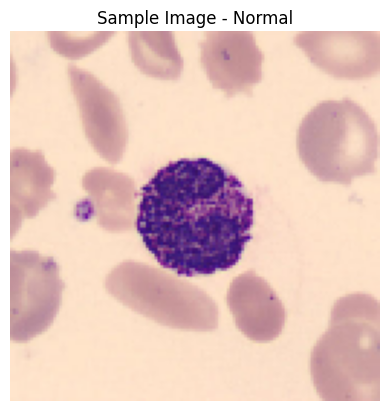

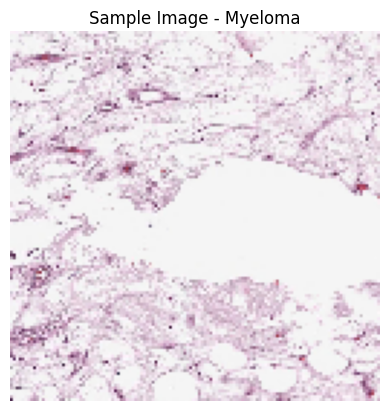

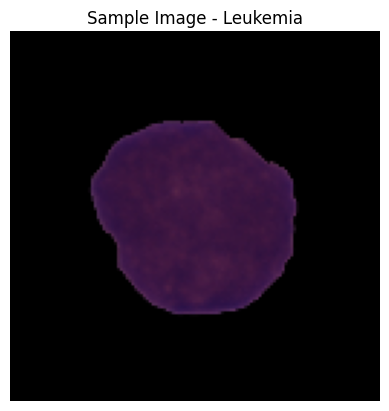

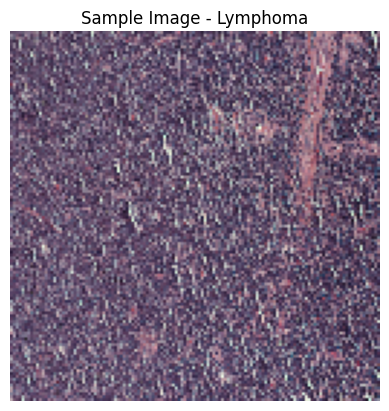

c:\Users\MONALISA\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

c:\Users\MONALISA\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 339ms/step - accuracy: 0.3629 - loss: 1.4886 - val_accuracy: 0.8250 - val_loss: 0.9361
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8208 - loss: 0.9300 
Validation Loss: 0.9360741376876831
Validation Accuracy: 0.824999988079071


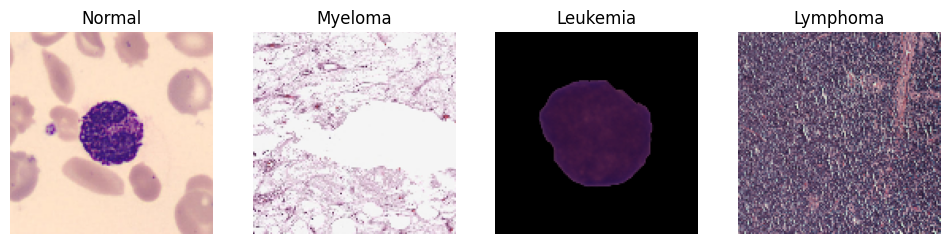

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


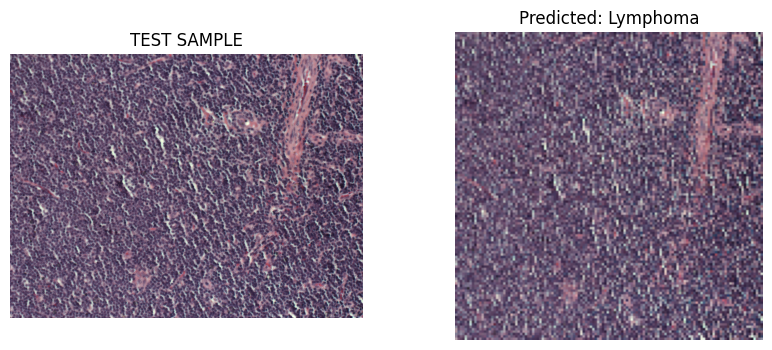

Prediction Result: Lymphoma


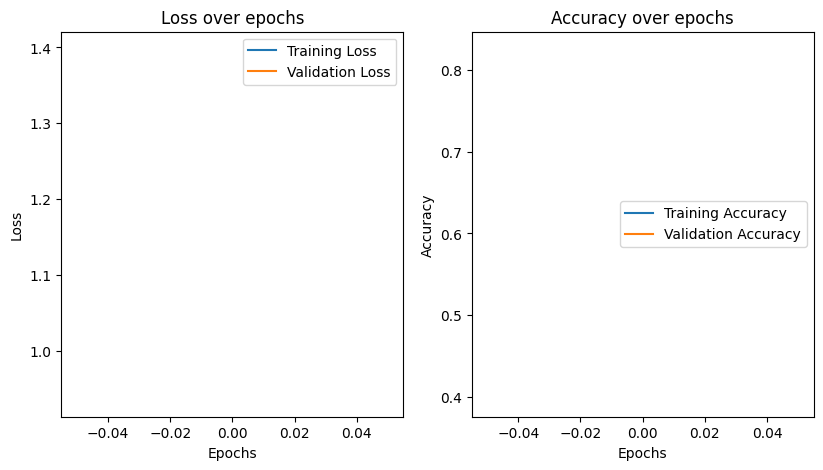

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step 


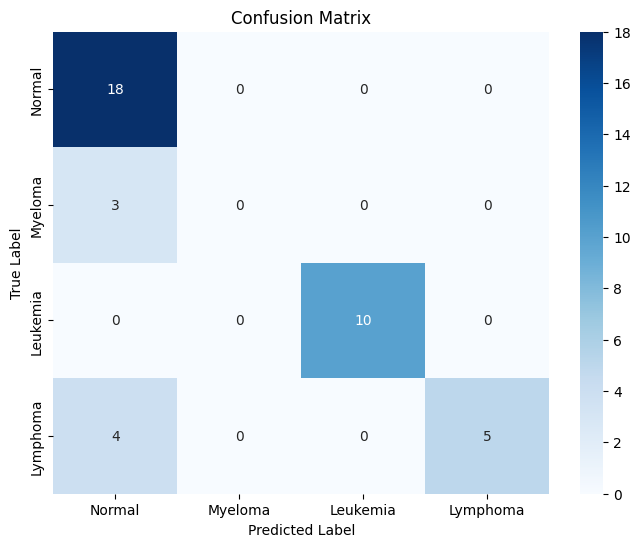

Accuracy: 0.82
Precision: 0.87
Recall: 0.82
F1 Score: 0.79
Normal - TP: 18, TN: 4, FP: 7, FN: 0
Myeloma - TP: 0, TN: 37, FP: 0, FN: 3
Leukemia - TP: 10, TN: 20, FP: 0, FN: 0
Lymphoma - TP: 5, TN: 26, FP: 0, FN: 4


In [3]:
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Set directory paths and categories for dataset
data_dir = "C:\\Users\\MONALISA\\Desktop\\BL_AI"
categories = ["Normal", "Myeloma", "Leukemia", "Lymphoma"]

# Parameters
img_size = 128  
data = []
labels = []

# Load and preprocess the data
for category in categories:
    folder_path = os.path.join(data_dir, category)
    label = categories.index(category)

    # Check if folder exists
    if not os.path.exists(folder_path):
        print(f"Folder does not exist: {folder_path}")
        continue

    displayed_sample = False  # Flag to ensure only one sample image is displayed per category
    for img in os.listdir(folder_path):
        try:
            img_path = os.path.join(folder_path, img)
            image = cv2.imread(img_path)
            if image is None:
                print(f"Image not loaded properly: {img_path}")
                continue
            image = cv2.resize(image, (img_size, img_size))
            data.append(image)
            labels.append(label)
            
            # Display one sample image per category
            if not displayed_sample:
                plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                plt.title(f"Sample Image - {category}")
                plt.axis('off')
                plt.show()
                displayed_sample = True
        except Exception as e:
            print("Error loading image:", e)

# Convert data to NumPy arrays and normalize
data = np.array(data) / 255.0  # Normalize pixel values
labels = np.array(labels)

# Convert labels to categorical (one-hot encoding)
labels = to_categorical(labels, num_classes=len(categories))

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(img_size, img_size, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(len(categories), activation="softmax")  # Adjusted for multi-class classification
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=1,
                    validation_data=(x_val, y_val))

# Evaluate the model
val_loss, val_accuracy = model.evaluate(x_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Display sample images in one row (Myeloma, Leukemia, Normal, Lymphoma)
def display_sample_images():
    plt.figure(figsize=(12, 4))
    
    # Display one sample image for each category
    for i, category in enumerate(categories):
        folder_path = os.path.join(data_dir, category)
        img_path = os.path.join(folder_path, os.listdir(folder_path)[0])  # Get the first image
        
        img = cv2.imread(img_path)
        if img is None:
            print(f"Error: The image file in {category} folder could not be read.")
            continue
        
        img_resized = cv2.resize(img, (img_size, img_size))
        
        # Subplot for each category image
        plt.subplot(1, 4, i+1)  # 1 row, 4 columns, i+1 for position
        plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
        plt.title(category)
        plt.axis('off')
    
    plt.show()

# Call function to display images in one row
display_sample_images()

# Prediction function with image display
def predict_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print("Error: The image file could not be read.")
        return None
    
    # Resize the image for prediction
    img_resized = cv2.resize(img, (img_size, img_size))
    img_input = img_resized.reshape(1, img_size, img_size, 3) / 255.0
    
    # Make a prediction
    prediction = model.predict(img_input)
    result_index = np.argmax(prediction)
    result_label = categories[result_index]
    
    # Display the test sample image and predicted label in one line
    plt.figure(figsize=(10, 4))
    
    # Display the test sample image
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("TEST SAMPLE")
    plt.axis('off')
    
    # Display the predicted label
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
    plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted: {result_label}")
    plt.axis('off')
    
    plt.show()
    
    return result_label  # Return result_label instead of None

# Example prediction
prediction_result = predict_image("C:\\Users\\MONALISA\\Desktop\\BL_AI\\image1.tif")
print(f"Prediction Result: {prediction_result}")

# Plot training history (Accuracy, Loss, Validation accuracy, and Validation Loss)
plt.figure(figsize=(15, 5))

# Plot loss curve
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy curve
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Evaluation Metrics Code
y_val_pred = model.predict(x_val)
y_val_pred_labels = np.argmax(y_val_pred, axis=1)
y_val_true_labels = np.argmax(y_val, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_val_true_labels, y_val_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Metrics calculation with zero_division parameter
accuracy = accuracy_score(y_val_true_labels, y_val_pred_labels)
precision = precision_score(y_val_true_labels, y_val_pred_labels, average='weighted', zero_division=1)
recall = recall_score(y_val_true_labels, y_val_pred_labels, average='weighted', zero_division=1)
f1 = f1_score(y_val_true_labels, y_val_pred_labels, average='weighted', zero_division=1)

# Display metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Additional confusion matrix details with TP, TN, FP, FN
def calculate_tp_tn_fp_fn(conf_matrix):
    tp, tn, fp, fn = [], [], [], []
    for i in range(len(categories)):
        tp.append(conf_matrix[i, i])
        tn.append(np.sum(np.delete(conf_matrix, i, axis=0), axis=0).sum() - tp[i])
        fp.append(np.sum(conf_matrix[:, i]) - tp[i])
        fn.append(np.sum(conf_matrix[i, :]) - tp[i])
    return tp, tn, fp, fn

tp, tn, fp, fn = calculate_tp_tn_fp_fn(conf_matrix)

# Display TP, TN, FP, FN for each class
for i, category in enumerate(categories):
    print(f"{category} - TP: {tp[i]}, TN: {tn[i]}, FP: {fp[i]}, FN: {fn[i]}")